In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(trainData, trainTargets), (testData, testTargets) = boston_housing.load_data()

In [3]:
trainData.shape, testData.shape

((404, 13), (102, 13))

In [4]:
mean = trainData.mean(axis=0)
trainData -= mean
std = trainData.std(axis=0)
trainData /= std

testData -= mean
testData /= std

In [5]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(trainData.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [6]:
import numpy as np

k=4
numValSamples = len(trainData) // k
numEpochs = 100
allScores = []
for i in range(k):
    print('처리 중인 폴드 #', i)
    valData = trainData[i * numValSamples: (i + 1) * numValSamples]
    valTargets = trainTargets[i * numValSamples: (i + 1) * numValSamples]
    
    partialTrainData = np.concatenate([trainData[:i * numValSamples],
                                       trainData[(i + 1) * numValSamples:]],
                                      axis=0)
    partialTrainTargets = np.concatenate([trainTargets[:i * numValSamples],
                                          trainTargets[(i + 1) * numValSamples:]],
                                         axis=0)
    model = build_model()
    model.fit(partialTrainData, partialTrainTargets,
              epochs=numEpochs, batch_size=1, verbose=0)
    valMse, valMae = model.evaluate(valData, valTargets, verbose=0)
    allScores.append(valMae)

처리 중인 폴드 # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
처리 중인 폴드 # 1
처리 중인 폴드 # 2
처리 중인 폴드 # 3


In [7]:
allScores

[2.100499731479305, 2.1598363205938056, 2.851843221352832, 2.383550756638593]

In [9]:
numEpochs = 500
allMaeHistories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    valData = trainData[i * numValSamples: (i + 1) * numValSamples]
    valTargets = trainTargets[i * numValSamples: (i + 1) * numValSamples]
    partialTrainData = np.concatenate([trainData[:i * numValSamples],
                                       trainData[(i + 1) * numValSamples:]],
                                      axis=0)
    partialTrainTargets = np.concatenate([trainTargets[:i * numValSamples],
                                          trainTargets[(i + 1) * numValSamples:]],
                                         axis=0)
    
    model = build_model()
    history = model.fit(x=partialTrainData, y=partialTrainTargets,
                        validation_data=(valData, valTargets),
                        epochs=numEpochs, batch_size=1, verbose=0)
    maeHistory = history.history['val_mean_absolute_error']
    allMaeHistories.append(maeHistory)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [10]:
averageMaeHistory = [
    np.mean([x[i] for x in allMaeHistories]) for i in range(numEpochs)
]

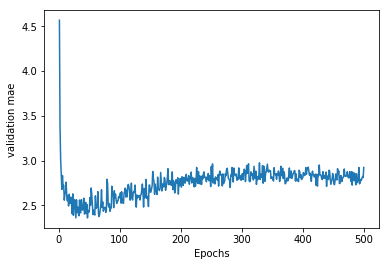

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1, len(averageMaeHistory) + 1), averageMaeHistory)
plt.xlabel('Epochs')
plt.ylabel('validation mae')
plt.show()


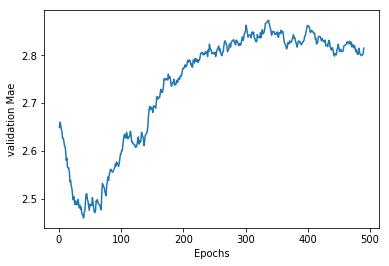

In [16]:
def smoothCurve(points, factor=0.9):
    smoothedPoints=[]
    for point in points:
        if smoothedPoints:
            previous = smoothedPoints[-1]
            smoothedPoints.append(previous * factor + point * (1-factor))
        else:
            smoothedPoints.append(point)
    return smoothedPoints
smoothMaeHistory = smoothCurve(averageMaeHistory[10:])

plt.plot(range(1, len(smoothMaeHistory) + 1), smoothMaeHistory)
plt.xlabel('Epochs')
plt.ylabel('validation Mae')
plt.show()

In [17]:
model = build_model()
model.fit(trainData, trainTargets, epochs=80, batch_size=16, verbose=0)
testMseScore, testMaeScore = model.evaluate(testData, testTargets)

102/102 [==============================] - 0s 766us/step


In [19]:
testMaeScore

2.89846050973032